# Pandas and Basemap

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
from pandas import Series, DataFrame
import pandas as pd

pd.set_option('display.mpl_style', 'default')

## Plotting Maps

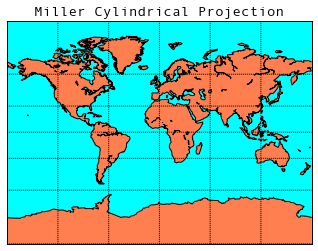

In [15]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Miller Cylindrical Projection")
plt.show()

## Visualizing Haiti

In [2]:
data = pd.read_csv('data/Haiti.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [5]:
data[['INCIDENT TITLE', 'INCIDENT DATE', 'LATITUDE', 'LONGITUDE', 'CATEGORY']].head(10)

,INCIDENT TITLE,INCIDENT DATE,LATITUDE,LONGITUDE,CATEGORY
0,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,18.233333,-72.533333,"1. Urgences | Emergency, 3. Public Health,"
1,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,50.226029,5.729886,"1. Urgences | Emergency, 2. Urgences logistiqu..."
2,how haiti is right now and how it was during t...,24/06/2010 16:21,22.278381,114.174287,"2. Urgences logistiques | Vital Lines, 8. Autr..."
3,Lost person,20/06/2010 21:59,44.407062,8.933989,"1. Urgences | Emergency,"
4,Citi Soleil school,18/05/2010 16:26,18.571084,-72.334671,"1. Urgences | Emergency,"
5,Radio Commerce in Sarthe,26/04/2010 13:14,18.593707,-72.310079,"5e. Communication lines down,"
6,Contaminated water in Baraderes.,26/04/2010 14:19,18.482800,-73.638800,"4. Menaces | Security Threats, 4e. Assainissem..."
7,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,18.415000,-73.195000,"4. Menaces | Security Threats,"
8,No electricity in pernier,15/03/2010 10:58,18.517443,-72.236841,"2. Urgences logistiques | Vital Lines, 2f. San..."
9,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,18.547790,-72.410010,"2. Urgences logistiques | Vital Lines, 2d. Ref..."


In [6]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [7]:
# Clean the data according to the info in describe()
from numpy import nan as nan
data = data[data.LATITUDE > 1 & (data.LATITUDE < 20) &
               (data.LONGITUDE > -75) & (data.LONGITUDE < -70) &
               data.CATEGORY.notnull()]
data.head(10)

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [8]:
# Write some functions to clean the CATEGORY cell

def to_cat_list(catstr):
    #if 'na' in catstr: print catstr
    #print catstr.split(','),
    try:
        stripped = (x.strip() for x in catstr.split(','))
    except:
        stripped = ('3. Public Health', '')  # We'll fix this later
    return [x for x in stripped if x]
    

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return set.union(*cat_sets)
   

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

In [9]:
all_cats = get_all_categories(data.CATEGORY)

In [10]:
from itertools import islice

english_mapping = dict(get_english(x) for x in all_cats)

#list(islice(english_mapping.iteritems(),10))
english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Contaminated water',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Asking to forward a message',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distr

In [11]:
english_mapping['1'], english_mapping['2a']

('Emergency', 'Food Shortage')